<a href="https://colab.research.google.com/github/Thaizalu/Data_Science/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="100%" src="https://github.com/Thaizalu/Imagens_Dataset/blob/6f3d0316a1112df90dd165ecc9a1531be000d3a1/cartao%20fraude.png?raw=true">

# **DETECÇÃO DE FRAUDES EM CARTÕES DE CRÉDITO**
*by [Thaiza Ludmila](https://www.linkedin.com/in/thaizalu/)*  

---

As fraudes em cartão de crédito são um problema crescente e complexo que afeta consumidores, instituições financeiras e comerciantes em todo o mundo. Em 2023, as perdas globais devido a fraudes com cartão de crédito foram estimadas em aproximadamente 32 bilhões de dólares, com a expectativa de atingir 40 bilhões de dólares até 2025, de acordo com a Nilson Report. Essa crescente incidência de fraudes destaca a necessidade de desenvolver e implementar métodos eficazes de detecção e prevenção.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

O aumento no uso de cartões de crédito e a proliferação do comércio eletrônico têm contribuído para o crescimento das fraudes. As fraudes podem ocorrer de várias formas, incluindo o uso não autorizado de informações de cartão roubadas ou clonadas, transações sem o cartão presente (CNP), e comprometimento de contas por meio de ataques de phishing e malware.

A detecção de fraudes em cartão de crédito envolve a aplicação de diversas técnicas de machine learning e análise de dados para identificar padrões anômalos que possam indicar atividades fraudulentas. As técnicas mais comuns incluem:

* Análise de Regras: Uso de regras pré-definidas para identificar transações suspeitas com base em critérios específicos, como valor da transação e localização geográfica.
* Modelos Estatísticos: Aplicação de métodos estatísticos para identificar anomalias em dados transacionais.
* Machine Learning: Implementação de algoritmos supervisionados e não supervisionados para aprender padrões normais de comportamento e detectar desvios que possam indicar fraude.
* Deep Learning: Uso de redes neurais profundas para analisar grandes volumes de dados e detectar padrões complexos de fraude.

As projeções indicam que, à medida que as tecnologias de pagamento se tornam mais sofisticadas, também evoluem as técnicas utilizadas pelos fraudadores. Portanto, a detecção de fraudes em cartão de crédito requer uma abordagem dinâmica e adaptativa. Espera-se que o uso de inteligência artificial (IA) e machine learning aumente significativamente, permitindo a detecção de fraudes em tempo real com maior precisão.

Para as instituições financeiras, o desafio reside em equilibrar a detecção de fraudes com a minimização de falsos positivos, que podem afetar negativamente a experiência do cliente. A implementação eficaz de sistemas de detecção de fraudes pode não apenas reduzir perdas financeiras, mas também aumentar a confiança dos consumidores nos serviços financeiros.

A análise de dados e as técnicas de machine learning são fundamentais para enfrentar o desafio das fraudes em cartão de crédito. À medida que a tecnologia avança, a capacidade de detectar e prevenir fraudes de maneira eficaz será crucial para proteger consumidores e empresas de perdas financeiras significativas. A constante evolução das fraudes exige um compromisso contínuo com a inovação e a adaptação de novas tecnologias para manter a segurança das transações financeiras.

Nas seções subsequentes, abordaremos a análise exploratória de dados (EDA) e a aplicação de técnicas de machine learning para a detecção de fraudes em um dataset específico de transações de cartão de crédito.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações o que torna o conjunto extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.



<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por [V1, V2, V3 ... V28]  após ter sido aplicado uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA), que trata-se de uma técnica que permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados componentes que podem ser um número menor ou igual às variáveis originais.

Tanto o dataset quanto algumas informações adicionais sobre esse conjunto de dados podem ser localizados no [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud).

Abaixo, segue a importação das bibliotecas importantes que serão utilizadas durante esse projeto.

In [1]:
#@title
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [23]:
# Importando as bibliotecas necessãrias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
svc = SVC()
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

from imblearn.under_sampling import RandomUnderSampler

from collections import Counter
from IPython.display import Image
import pydotplus

# Configuring the notebook
sns.set()
%matplotlib inline

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

Para facilitar a aquisição dos dados, o Sigmoidal forneceu um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [72]:
# importar os dados para um dataframe
df = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")

# verificando as 5 primeiras entradas
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


O referente dataset conta com 31 colunas, porém apenas 3 são caracterizadas, sendo elas:
* Time: Número de segundos decorridos entre esta transação e a primeira transação no conjunto de dados
* Amount: Valor da transação
* Class: 1 para transações fraudulentas, 0 caso contrário

Através do código abaixo, podemos identificar o tamanho do nosso dataset, a quantidade de colunas existentes, o tipo de dados e a quantidade de dados não nulos. Já é um bom indício para explorar sobre dados faltantes.

In [25]:
# Verificando o tamanho do dataset

print('Informações sobre o dataset')
print('Variáveis:\t{}'.format(df.shape[1]))
print('Entradas:\t{}'.format(df.shape[0]))

# Identificando os tipos de variáveis
display(df.info())

Informações sobre o dataset
Variáveis:	31
Entradas:	284807
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  fl

None

Já era possível observar que não havia existência de dados nulos, mas o código abaixo tem também o mesmo efeito e pode ser rapidamente acionado.

In [26]:
# ver se há valores ausentes
df.isnull().sum().max()

0

Usando o método `describe()` podemos visualizar a distribuição estatística do dataframe. Utilizando esse método, temos informações que podem nos ajudar a:

* Identificar outliers.
* Entender melhor a distribuição dos dados.
* Identificar falhas na distribuição dos dados.
* Após a limpeza dos dados, verificar a eficácia e as diferenças entre os dados tratados e não tratados.

No entanto, para este conjunto de dados aplicaremos essa funcionalidade para as duas variáveis que não estão transformadas que é `Time` e `Amount`.
Para a variável `Time` (tempo em segundos) não foi possível identificar discrepâncias aparentes. Em relação à variável `Amount`, nota-se que o valor médio de transações (considerando ambas as classes) é 88.34, mediana igual a 22.00 e desvio padrão de 250.12. Atingindo o valor máximo de 25691.16, a maioria das transações financeiras é composta em sua maioria por quantias menores - como esperado.

**Relembrando alguns conceitos básicos de Estatística Descritiva:**

<p align=center>
<img src="https://github.com/Thaizalu/Imagens_Dataset/blob/b3749cf3cbe35c01333c95b4158ac87c196b4e2d/ED.png?raw=true" width="100%"></p>

In [70]:
# aplicando describe apenas para as colunas Time e Amount
df[['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


Como podemos ver no gráfico abaixo, trata-se de um conjunto com dados desbalanceados, pois o evento fraude apresenta frequência de ocorrência muito menor que o evento normal. Esse é um ponto importante para ser ajustado no momento de iniciar a aplicação de técnicas de machine learning para que não sejam construídos modelos enviesados. Falaremos mais adiante sobre como balancear esses dados.

Class
0    284315
1       492
Name: count, dtype: int64

Fraudes representam 0.1727% do dataset.



[]

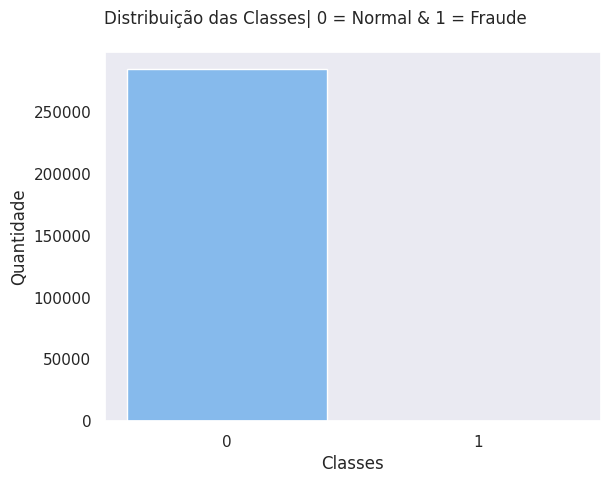

In [73]:
# ver o balanceamento das classes
print(df.Class.value_counts())
print("\nFraudes representam {:.4f}% do dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# plotar gráfico de barras para as Classes
fig, ax = plt.subplots()
sns.countplot(x='Class', data=df, ax=ax, color='#75bbfd')
ax.set_title('Distribuição das Classes| 0 = Normal & 1 = Fraude', loc='left', pad=20)
ax.set_xlabel('Classes')
ax.set_ylabel('Quantidade')
plt.plot()

Plotou-se também dois gráficos a fim de comparar as distribuições das 2 classes ao longo da dimensão tempo `Time`. No entanto, não foi identificada nenhum informação a partir das distribuições de frequência abaixo que pudessem contribuir para a análise.

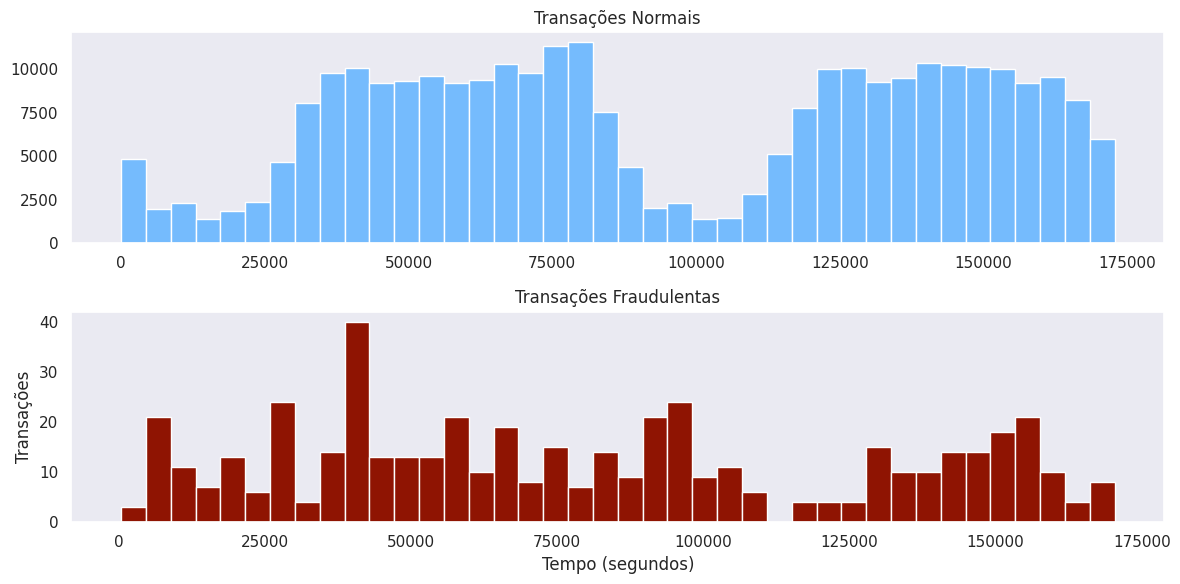

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins, color='#75bbfd')
ax[0].set_title('Transações Normais')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins, color='#8f1402')
ax[1].set_title('Transações Fraudulentas')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

Plotou-se também dois gráficos a fim de comparar as distribuições das 2 classes ao longo da dimensão tempo `Amount`. É possível observar que grande parte das transações fraudulentas se concentram em valores menores.

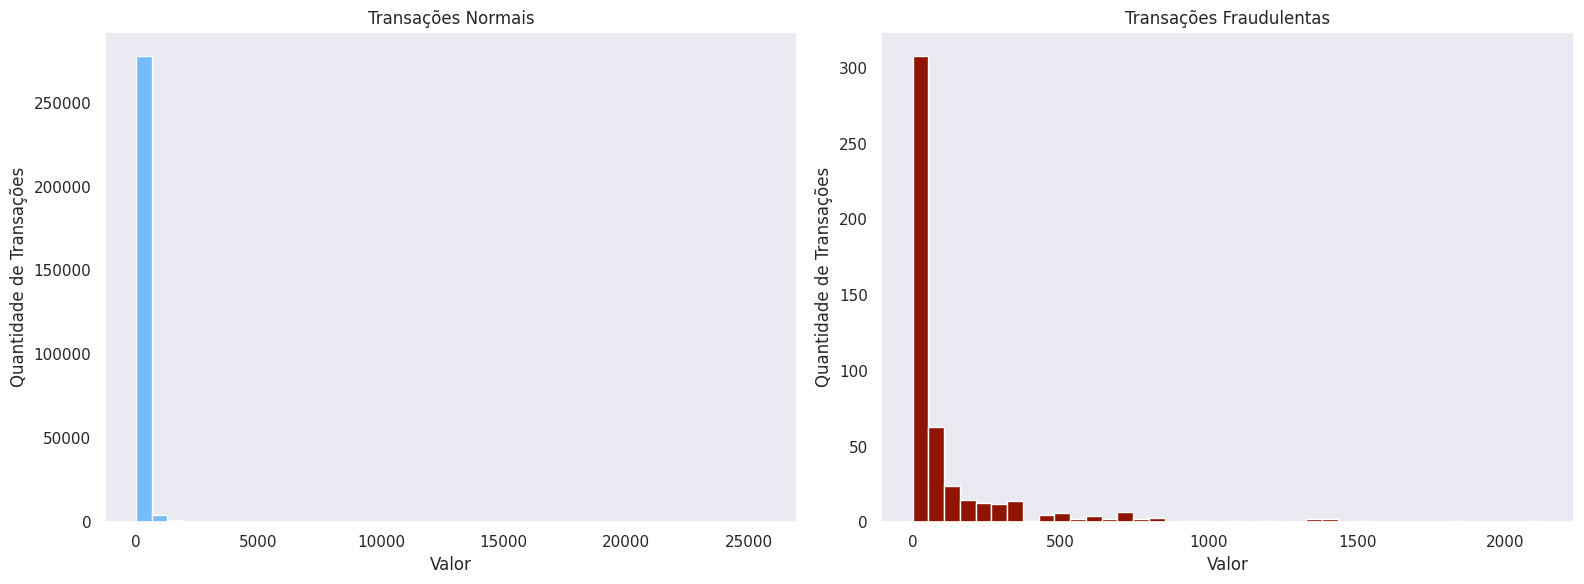

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

num_bins = 40

ax[0].hist(df.Amount[df.Class == 0], bins=num_bins, color='#75bbfd')
ax[0].set_title('Transações Normais')
ax[0].set_xlabel('Valor')
ax[0].set_ylabel('Quantidade de Transações')

ax[1].hist(df.Amount[df.Class == 1], bins=num_bins, color='#8f1402')
ax[1].set_title('Transações Fraudulentas')
ax[1].set_xlabel('Valor')
ax[1].set_ylabel('Quantidade de Transações')

plt.tight_layout()

Seguindo a análise exploratória, plotou-se os *boxplots* para ver se há alguma diferença no padrão transações em relação à dimensão `Time` e `Amount`. Para a dimensão `Time` não há comentários relevantes a serem feitos, no entano, para a variável `Amount`, percebe-se uma distribuição diferente para as duas classes, o que provavelmente irá contribuir para o treinamento do modelo de **machine learning**.

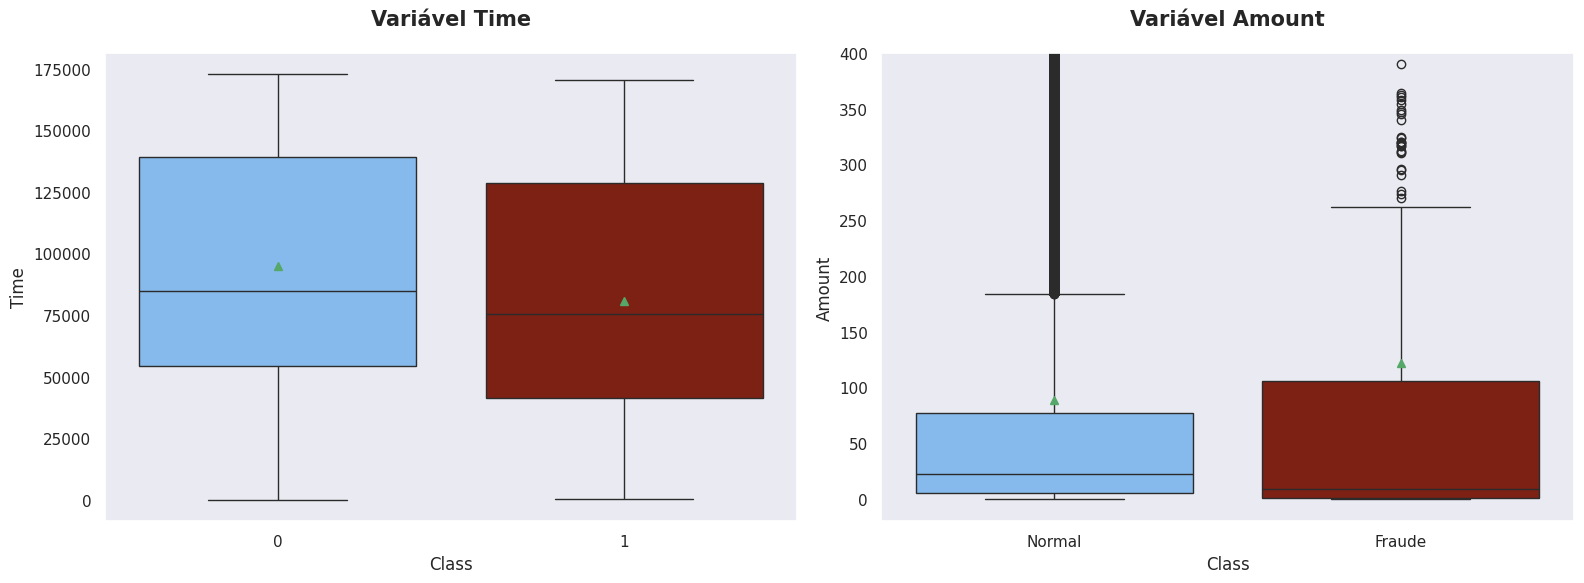

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Pass 'x' and 'y' as keyword arguments
sns.boxplot(x=df.Class, y=df.Time, data=df, showmeans=True, ax=ax[0], palette={'0': '#75bbfd', '1': '#8f1402'})
plt.xticks([0, 1], ['Normal', 'Fraude'])
ax[0].set_title('Variável Time',fontsize=15, fontweight='bold',pad=20)

sns.boxplot(x=df.Class, y=df.Amount, showmeans=True, ax=ax[1], palette={'0': '#75bbfd', '1': '#8f1402'})
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])
ax[1].set_title('Variável Amount',fontsize=15, fontweight='bold',pad=20)

plt.tight_layout()
plt.show()

O gráfico de densidade é muito útil para compararmos as distribuições de cada variável para cada classe e ver quais as mais importantes para detecção de anomalias. O que se procura nesse tipo de visualização são distribuições que diferem uma da outra, permitindo identificar fraudes mais facilmente. Veja como exemplo as variáveis `V3`, `V4`, `V10` , `V11`, `V12`, `V14` e `V17` como elas são bem distintas.
Por outro lado, variáveis como `V13` , `V15`  e `V28`, por exemplo, são muito similares, apresentando aproximadamente o mesmo comportamento.

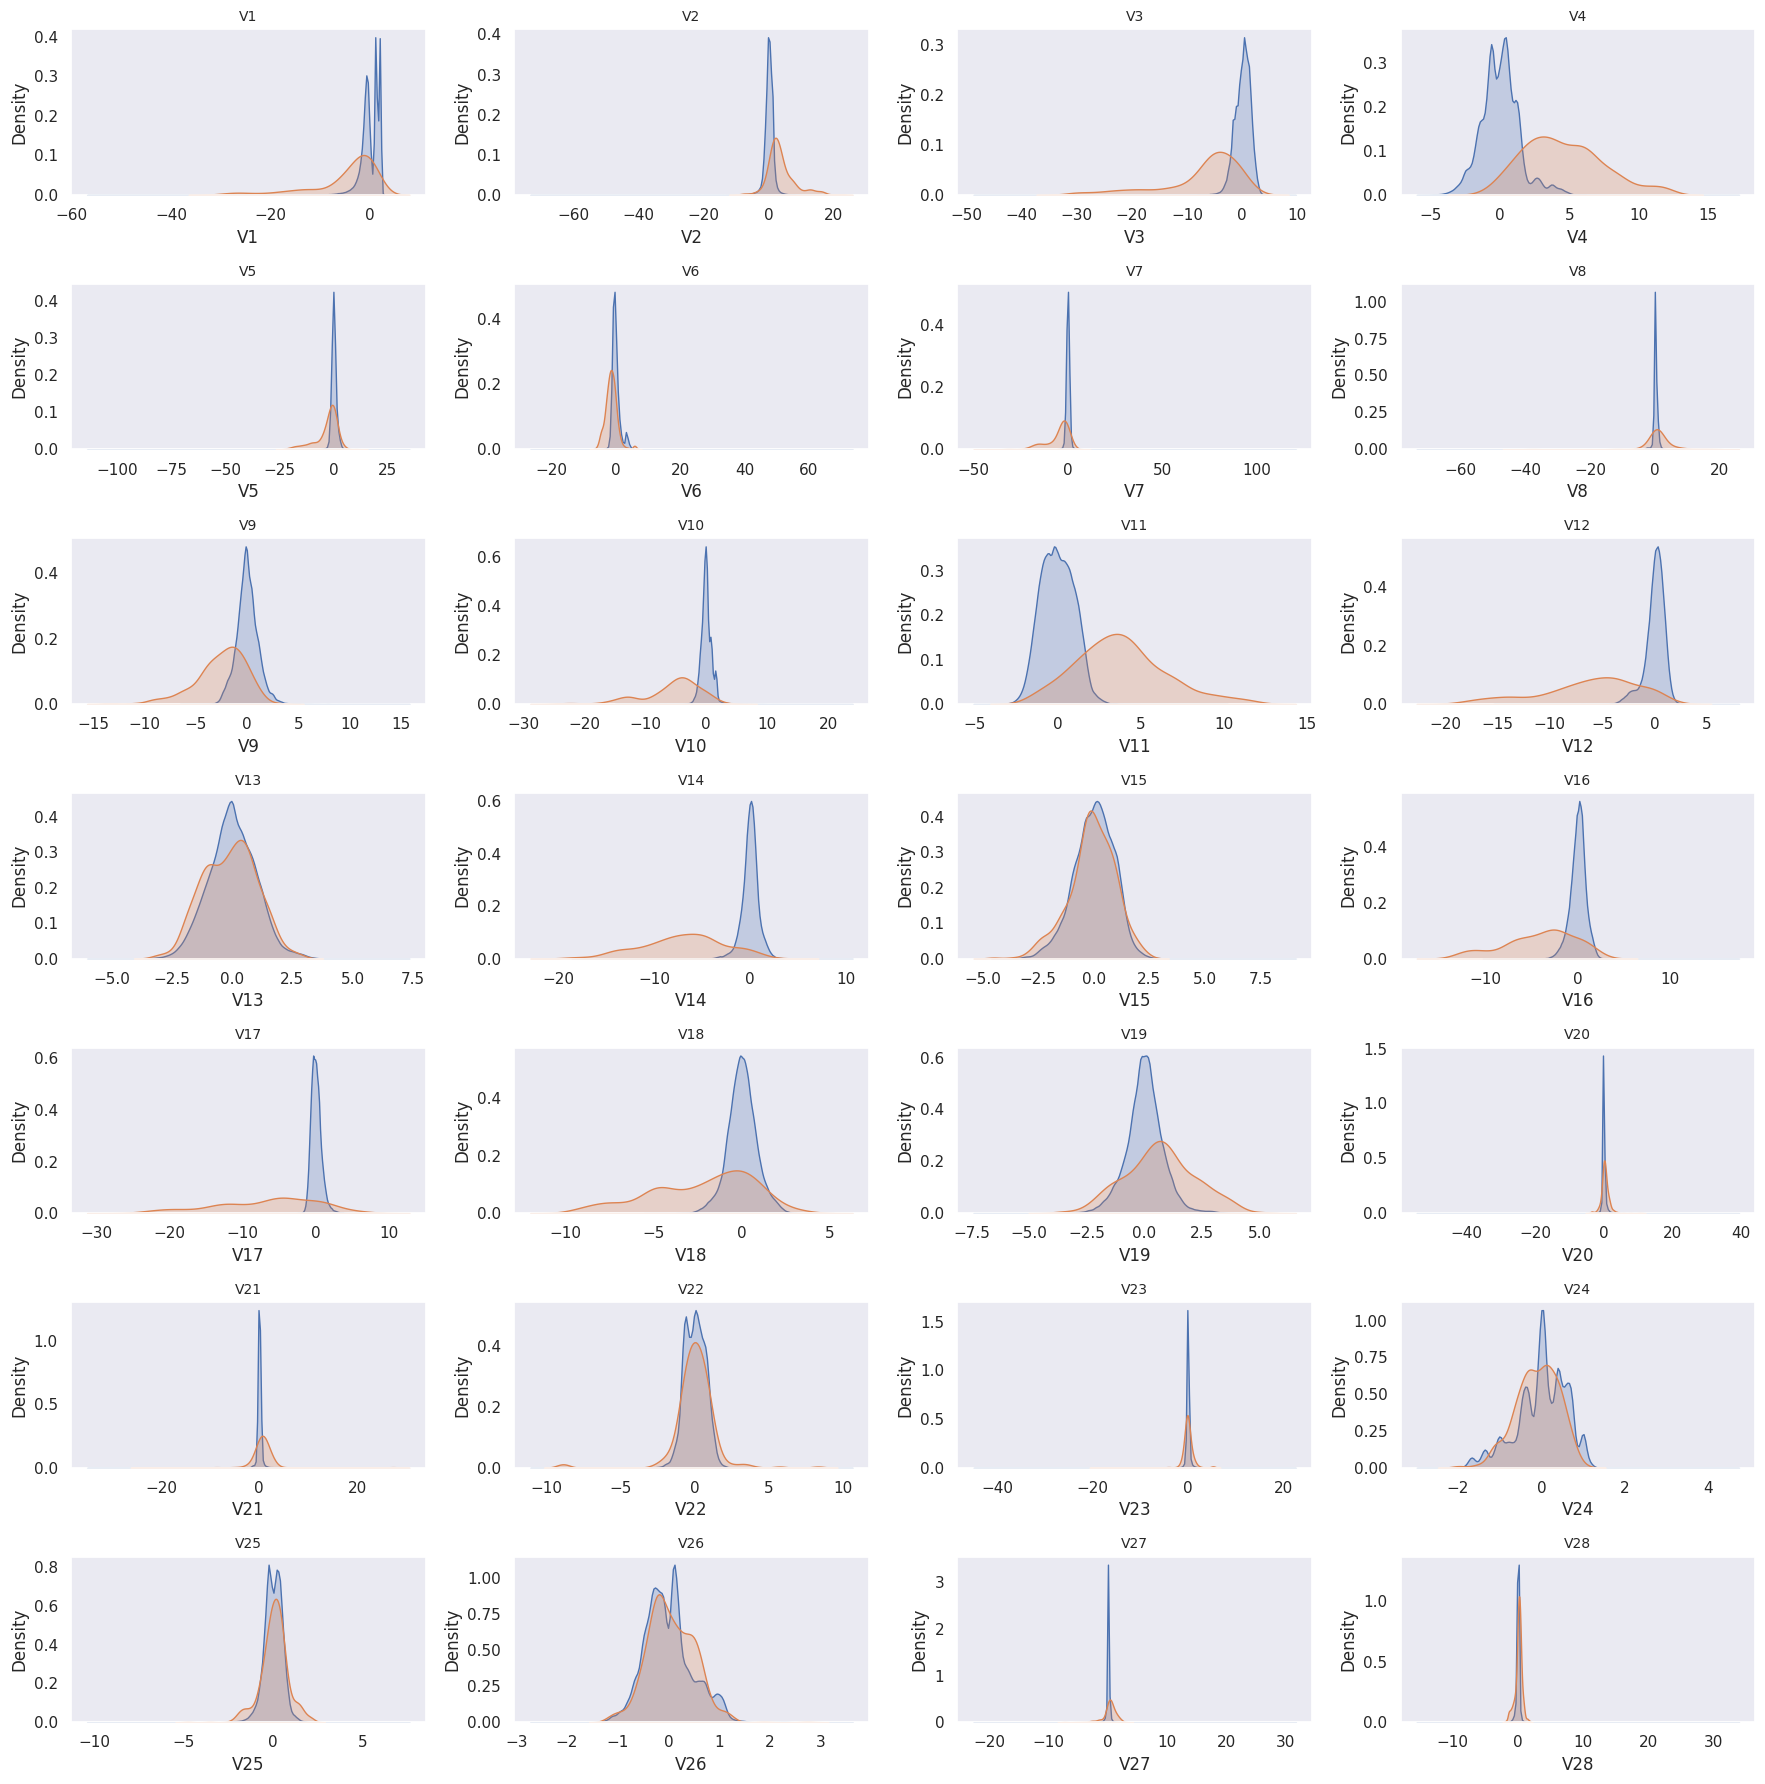

In [75]:
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()

Como nossos dados estão desbalanceados, observaremos a seguir que o gráfico de correlação não traz nenhuma informação de relevante.

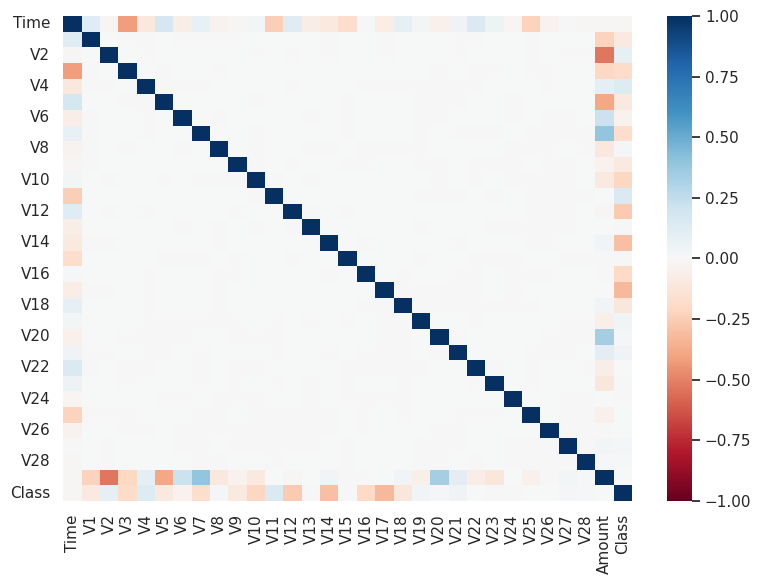

In [71]:
# construção do gráfico de correlação
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, cmap='RdBu', vmin=-1)

plt.tight_layout()
plt.show()

#Preparando os dados
Para que os dados possam alimentar os modelos de classificação que iremos construir, nesta etapa de preparação iremos:

* Padronizar as features Time e Amount, que estão em outra ordem de grandeza.
* Dividir entre dados de treino e teste
* Balancear os dados a fim de evitar uma baixa performance para a classe 1 e overfitting.

**1. Padronizar `Time` e `Amount`**

Para esta etapa, será usada a padronização por meio da classe `StandardScaler`.

In [46]:
# padronizar as colunas Time e Amount
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


**2. Dividir entre conjuntos de treino e teste**

Antes de proceder com o balanceamento de dados, devemos splitar os dados já existentes entre treino e teste. Caso contrário, não teremos parâmetros para conferir se o balanceamento foi adequado. Para garantir que os conjuntos de treino e teste tenham a mesma quantidade de classes proporcionalmente, passamos stratify=True.

* Dados desbalanceados

In [47]:
# separar variáveis entre X e y
X = df_clean.drop('Class', axis=1)
y = df['Class']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

**3. Balanceamento dos dados**

Usando a biblioteca `imblearn` é possível aplicar facilmente técnicas de balanceamento de dados. No caso, a opção neste projeto foi usar **Under-sampling**, preservando a classe minoritária. É fácil ver que não há mais aquela discrepância inicial (gráfico de barras no início deste *notebook*).

Class
0    369
1    369
Name: count, dtype: int64


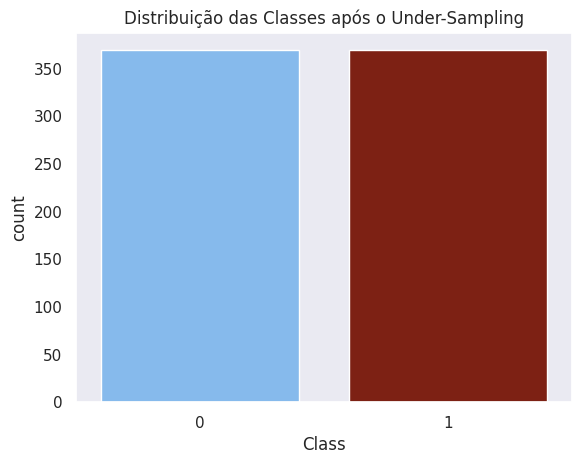

In [52]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# Definir cores para cada classe
palette={'0': '#75bbfd', '1': '#8f1402'}

# plotar a nova distribuição de classes
sns.countplot(x=y_rus, palette=palette)
plt.title('Distribuição das Classes após o Under-Sampling')
plt.show();

Com os dados balanceados, podemos ver a matriz de correlação e identificar quais variáveis estão mais fortemente relacionadas com as outras. Observe como anteriormente, sem o balanceamento de dados, a matriz de correlação não trazia nenhuma informação relevante. Entretanto, ela traz muito mais informações após um correto balanceamento.

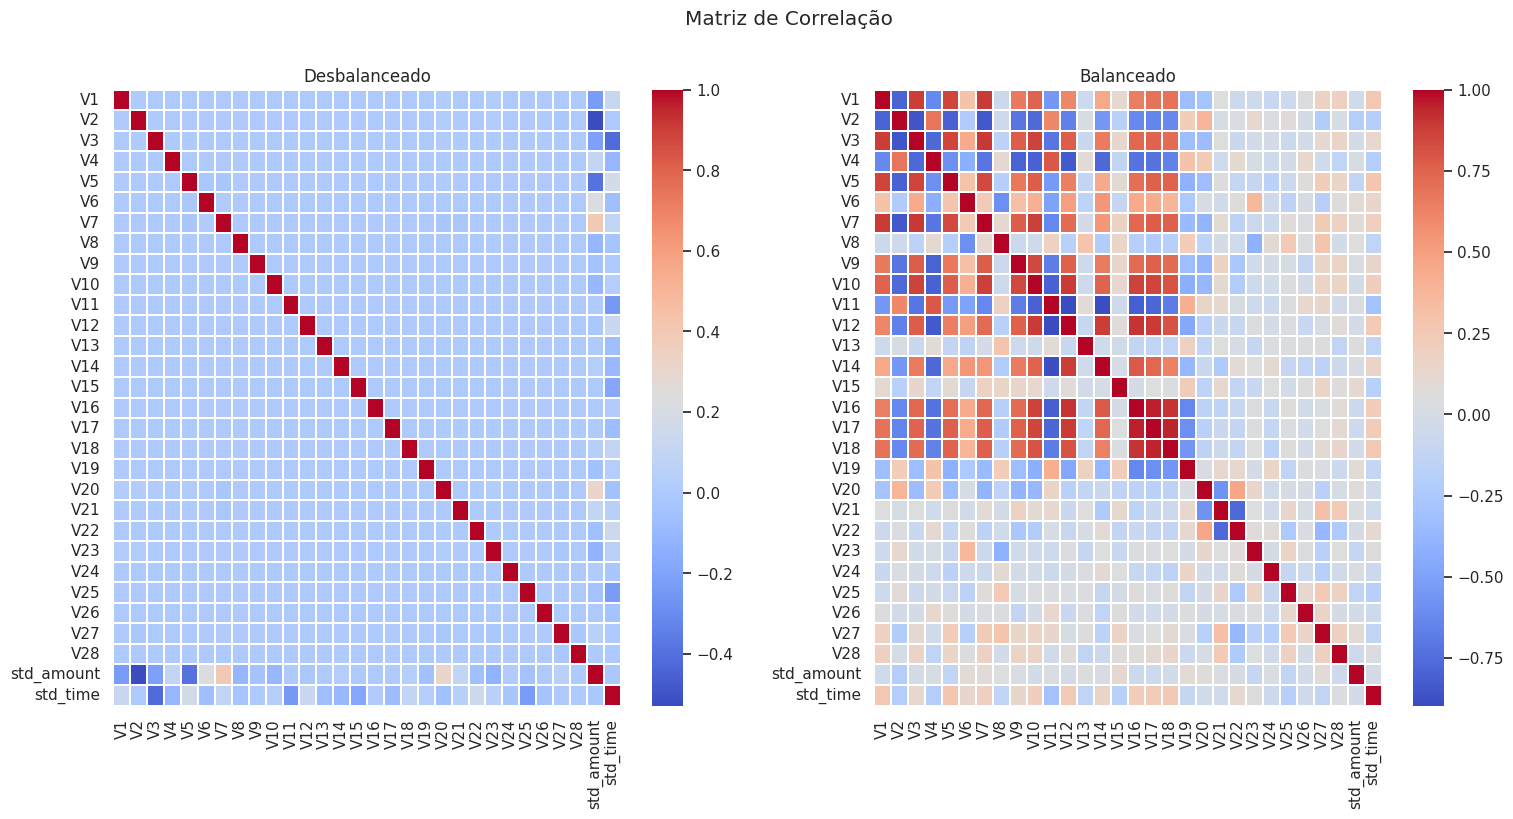

In [53]:
# plotar a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

# Modelo de Machine Learning
Construir um modelo para **classificação**.

Serão utilizados nesse projeto os seguintes algorítmos:

*   **Regressão Logística**
*   **SVM**
*   **Random Forest**
*   **Decision Tree**
*   **XGBoost**

Ao final prepararemos uma tabela para comparar de forma mais intuitiva a performance de cada modelo e a definir a escolha daquele que melhor atende aos requisitos deste problema.

### **Regressão Logística**

A Regressão Logística é um algoritmo de classificação que modela a probabilidade de uma classe binária. É uma extensão da regressão linear usada para tarefas de classificação.

Como Funciona:

* Usa a função logística (sigmóide) para transformar a saída de uma regressão linear em uma probabilidade.
* A saída é interpretada como a probabilidade de uma instância pertencer à classe positiva.

Aplicações:

* Detecção de fraudes.
* Diagnóstico médico.
* Análise de churn.

Vantagens:

* Simplicidade e interpretabilidade.
* Eficaz para problemas de classificação binária.

Desvantagens:

* Pode não funcionar bem com classes não linearmente separáveis.
* Sensível a outliers.

Com todos os dados preparados e após uma análise exploratória completa, irei construir um classificador usando a Regressão Logística.

Após instanciar o modelo, o mesmo será treinado em cima dos dados em `X_rus` e `y_rus`. Na sequência, serão realizadas as previsões sobre os dados de teste.

In [54]:
# instanciar e treinar um modelo de Regressão Logística
np.random.seed(2)
LogisticRegressionModel = LogisticRegression()

# Aplicar cross validation
results = cross_val_score(LogisticRegressionModel, X_rus, y_rus, cv = 10, scoring = 'recall')

LogisticRegressionModel.fit(X_rus, y_rus)

LogisticRegression()

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71079
           1       0.05      0.94      0.09       123

    accuracy                           0.97     71202
   macro avg       0.52      0.96      0.54     71202
weighted avg       1.00      0.97      0.98     71202



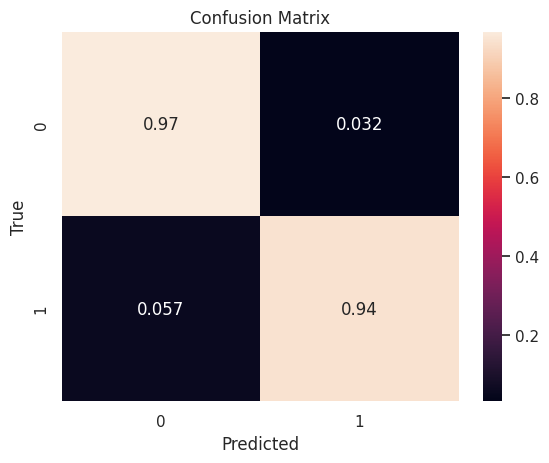

ROC AUC Score: 0.9555


In [55]:
# fazer as previsões em cima dos dados de teste
y_pred_LR = LogisticRegressionModel.predict(X_test)
y_proba = LogisticRegressionModel.predict_proba(X_test)

# Imprimir relatório
def report(pred):
    print(classification_report(y_test, y_pred_LR))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, y_pred_LR, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(y_test, y_pred_LR), 4)}')

report(LogisticRegressionModel)

### **SVM**

SVM é um algoritmo de classificação que encontra o hiperplano que melhor separa as classes no espaço de características. Pode ser usado para classificação binária e multiclasse.

Como Funciona:

* Identifica um hiperplano que maximiza a margem entre as classes.
* Pode usar kernels para transformar dados não linearmente separáveis em um espaço de maior dimensão onde se tornam linearmente separáveis.

Aplicações:

* Reconhecimento de imagens.
* Bioinformática.
* Análise de texto.

Vantagens:

* Eficaz em espaços de alta dimensionalidade.
* Usa um subconjunto de pontos de treinamento (vértices de suporte), tornando-o eficiente em termos de memória.

Desvantagens:

* Pode ser ineficiente em termos de tempo de computação com grandes conjuntos de dados.
* A escolha do kernel adequado pode ser complexa.

In [56]:
np.random.seed(2)
SVMmodel = SVC()
results = cross_val_score(SVMmodel, X_rus,
                          y_rus, cv = 10, scoring = 'recall')

SVMmodel.fit(X_rus, y_rus)

SVC()

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.10      0.90      0.18       123

    accuracy                           0.99     71202
   macro avg       0.55      0.94      0.58     71202
weighted avg       1.00      0.99      0.99     71202



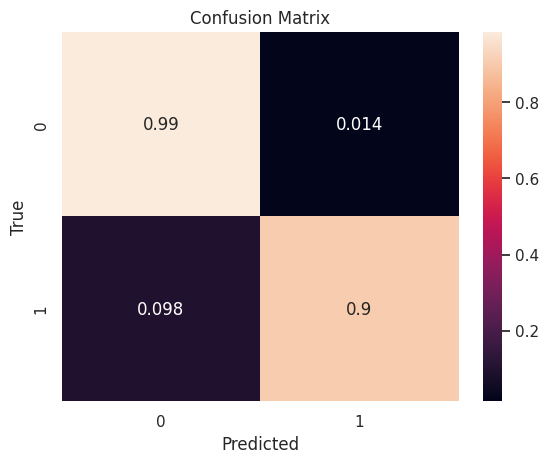

ROC AUC Score: 0.944


In [57]:
# fazer as previsões em cima dos dados de teste
y_pred_SVM = SVMmodel.predict(X_test)

# Imprimir relatório
def report(pred):
    print(classification_report(y_test, y_pred_SVM))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, y_pred_SVM, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(y_test, y_pred_SVM), 4)}')

report(SVMmodel)

### **Random Forest**

Random Forest é um algoritmo de ensemble que usa múltiplas árvores de decisão para melhorar a precisão e controlar o overfitting.

Como Funciona:

* Constrói múltiplas árvores de decisão em subconjuntos aleatórios dos dados e combina suas previsões.
* Cada árvore é construída a partir de um bootstrapped sample do dataset, e um subconjunto aleatório de características é considerado para cada divisão.

Aplicações:

* Classificação e regressão.
* Sistemas de recomendação.
* Análise de risco de crédito.

Vantagens:

* Reduz o overfitting em comparação com uma única árvore de decisão.
* Maneja bem conjuntos de dados grandes e com muitas características.

Desvantagens:

* Mais complexo e menos interpretável do que uma única árvore de decisão.
* Requer mais recursos computacionais.

In [58]:
# criando e treinando o modelo
seed = 2
RandomForestModel = RandomForestClassifier(n_jobs = -1,
                            n_estimators= 1000,
                            max_features= 0.3,
                            max_depth= 3,
                            min_samples_leaf= 3,
                            random_state= seed, verbose= 0, oob_score = 5)

# cross validation Random Forest Classifier
results = cross_val_score(RandomForestModel, X_rus,
                          y_rus, cv = 5, scoring = 'recall')

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.10      0.90      0.18       123

    accuracy                           0.99     71202
   macro avg       0.55      0.94      0.59     71202
weighted avg       1.00      0.99      0.99     71202



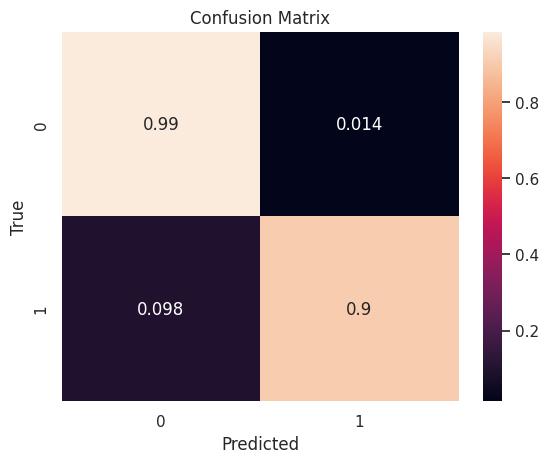

ROC AUC Score: 0.9441


In [59]:
# fazendo previsões
RandomForestModel.fit(X_rus, y_rus)
y_pred_RF = RandomForestModel.predict(X_test)
y_proba = RandomForestModel.predict_proba(X_test)

# Imprimir relatório
def report(pred):
    print(classification_report(y_test, y_pred_RF))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, y_pred_RF, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(y_test, y_pred_RF), 4)}')

report(RandomForestModel)

Identificando as features mais importantes para o resultado do modelo.

In [60]:
# calculando importância das features para Random Forest
feature_importances = pd.DataFrame(RandomForestModel.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={"index": "features"}, inplace=True)

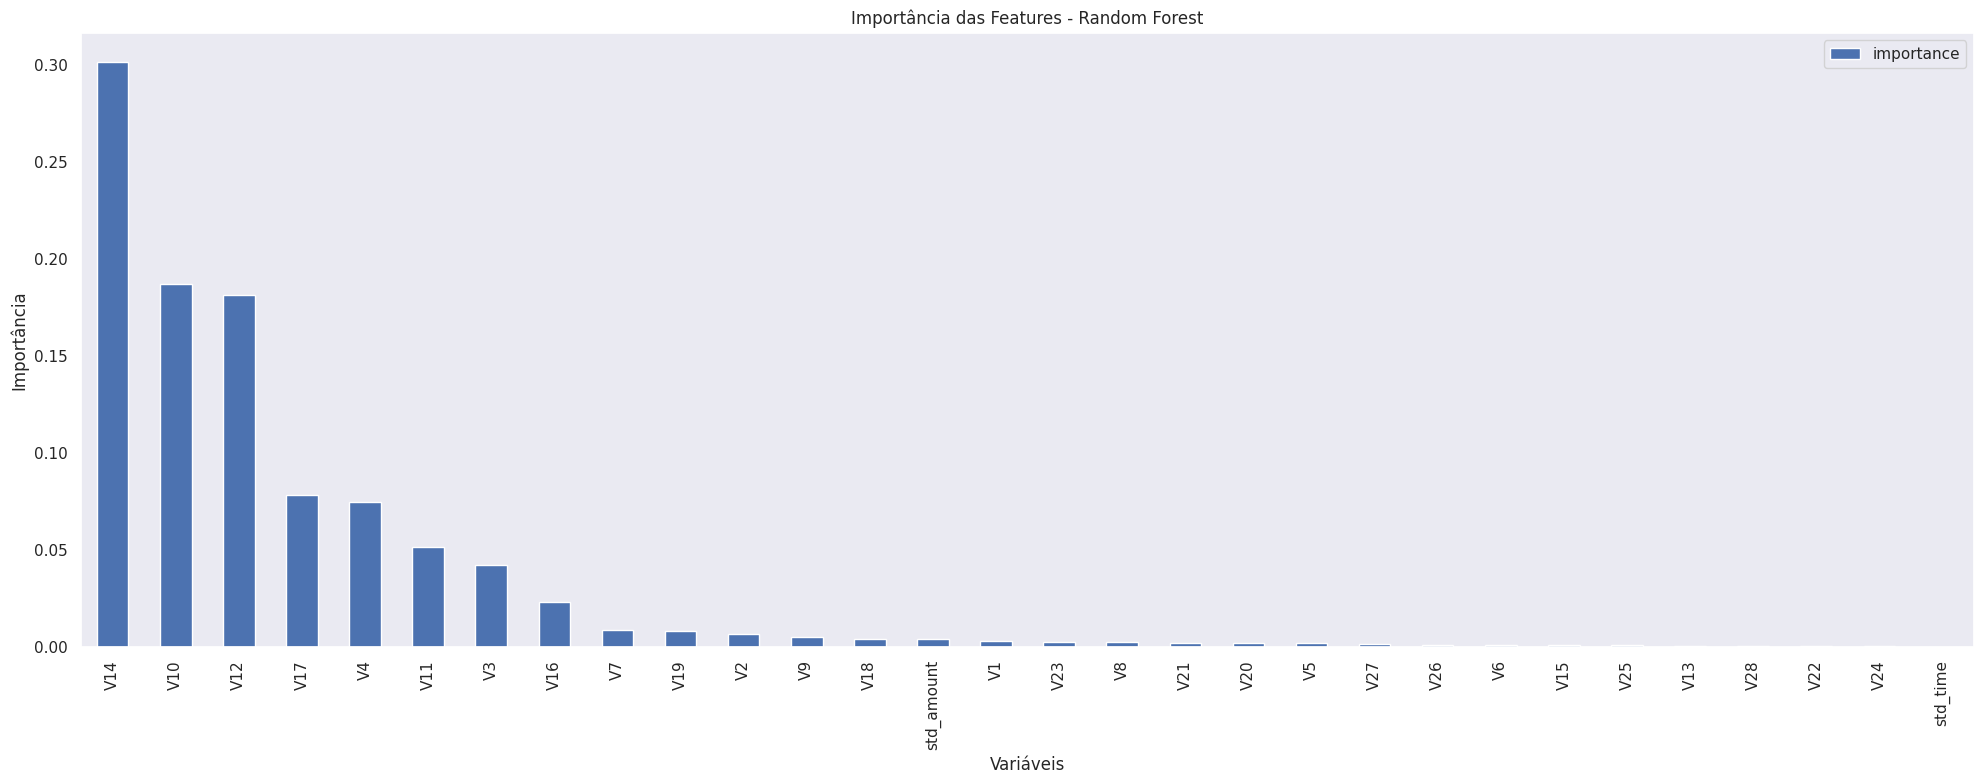

In [61]:
# plotar o gráfico de barras para variáveis mais importantes
fig, ax = plt.subplots(figsize=(20,8))

feature_importances.plot(x="features", y="importance", kind="bar", ax=ax)

ax.set_title("Importância das Features - Random Forest")
ax.set_xlabel("Variáveis")
ax.set_ylabel("Importância")

plt.tight_layout()

### **Decision Tree**

Uma árvore de decisão é um modelo de previsão que divide repetidamente os dados em subconjuntos mais homogêneos, usando uma estrutura de árvore.

Como Funciona:

* Cada nó interno representa uma "pergunta" sobre um atributo.
* Cada ramo representa o resultado dessa pergunta.
* Cada folha representa uma classe ou valor de previsão.

Aplicações:

* Análise de crédito.
* Sistemas de recomendação.
* Diagnóstico médico.

Vantagens:

* Fácil de entender e interpretar.
* Pode manejar tanto dados categóricos quanto numéricos.

Desvantagens:

* Propenso a overfitting, especialmente em conjuntos de dados ruidosos.
* Pequenas variações nos dados podem resultar em uma árvore completamente diferente.

In [62]:
DecisionTreeModel = DecisionTreeClassifier(max_depth=4, criterion="entropy")

# Fit do modelo (treinar)
DecisionTreeModel.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.87      0.84      0.85       123

    accuracy                           1.00     71202
   macro avg       0.93      0.92      0.93     71202
weighted avg       1.00      1.00      1.00     71202



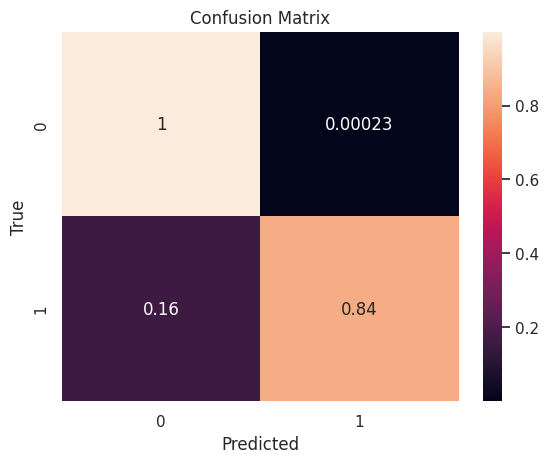

ROC AUC Score: 0.9186


In [63]:
# fazendo previsões
y_pred_DT = DecisionTreeModel.predict(X_test)

## Imprimir relatório
def report(pred):
    print(classification_report(y_test, y_pred_DT))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, y_pred_DT, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(y_test, y_pred_DT), 4)}')

report(DecisionTreeModel)

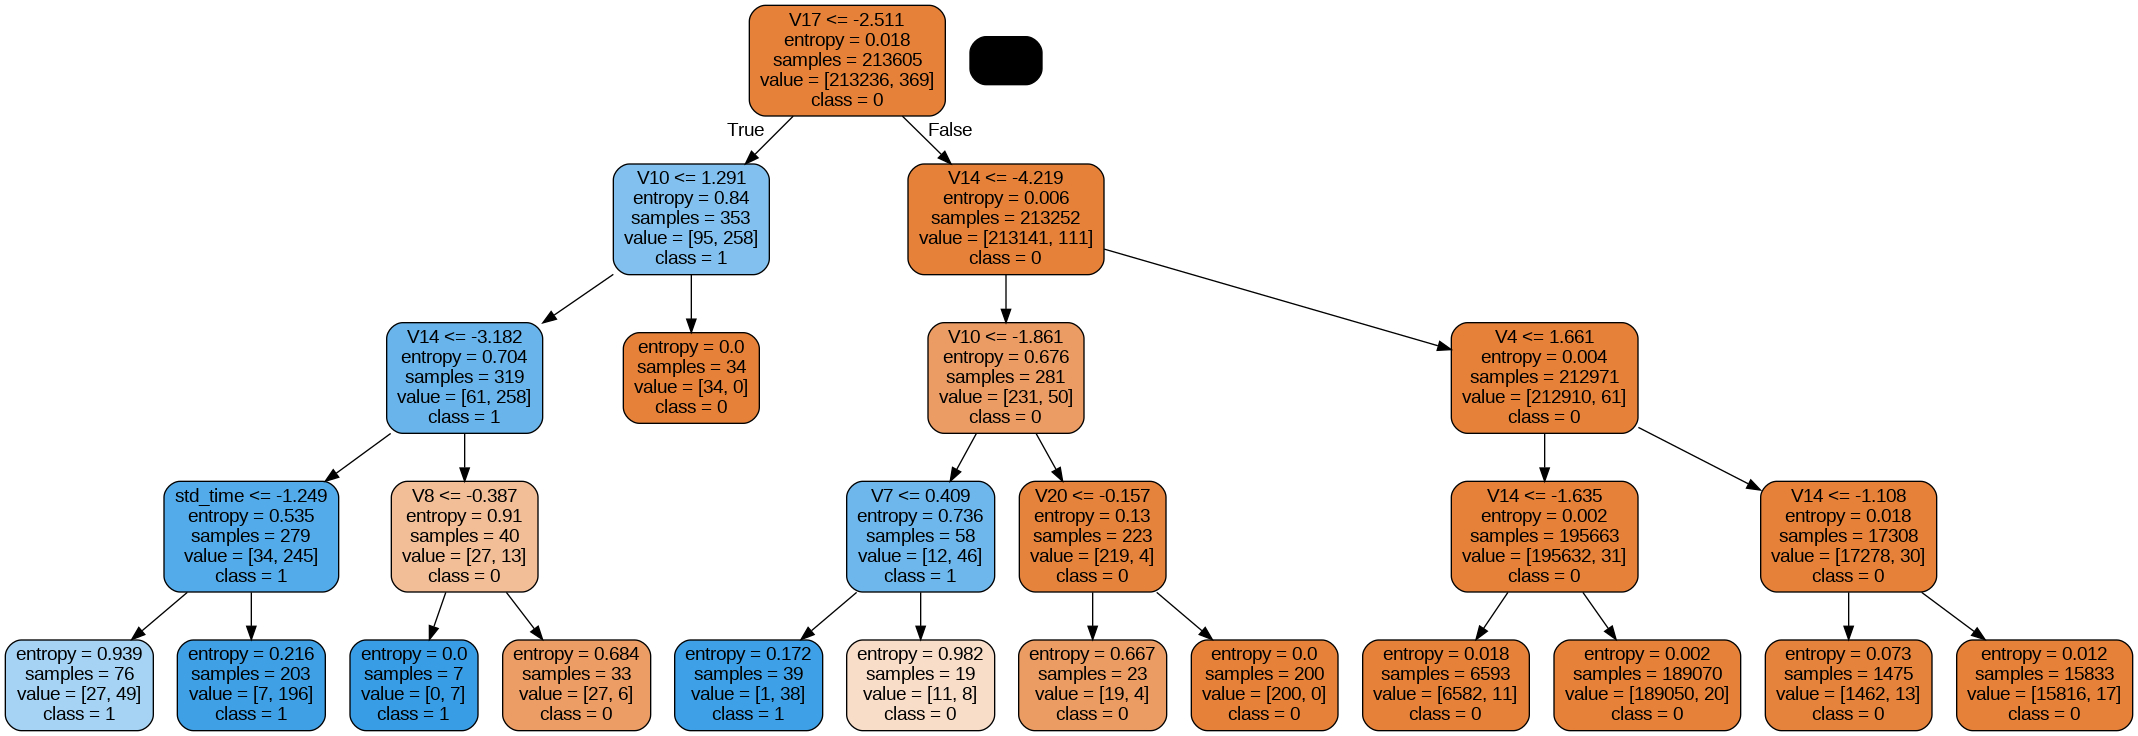

In [64]:
# criar DOT
dot = export_graphviz(DecisionTreeModel, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1'])

# plotar
graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())

## **XGBoost**

XGBoost (Extreme Gradient Boosting) é um algoritmo de boosting que combina a previsão de múltiplos modelos fracos para formar um modelo forte.

Como Funciona:

* Iterativamente ajusta novos modelos para corrigir os erros residuais dos modelos anteriores.
* Usa uma abordagem de boosting por gradiente para otimizar a função de perda.

Aplicações:

* Competições de machine learning.
* Análise financeira.
* Sistemas de recomendação.

Vantagens:

* Alta precisão e performance.
* Inclui regularização para prevenir overfitting.
* Escalável e eficiente em termos de tempo de execução.

Desvantagens:

* Mais complexo de implementar e ajustar do que algoritmos básicos.
* Requer mais recursos computacionais.

In [65]:
XGBModel = XGBClassifier()

XGBModel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.91      0.83      0.87       123

    accuracy                           1.00     71202
   macro avg       0.96      0.91      0.93     71202
weighted avg       1.00      1.00      1.00     71202



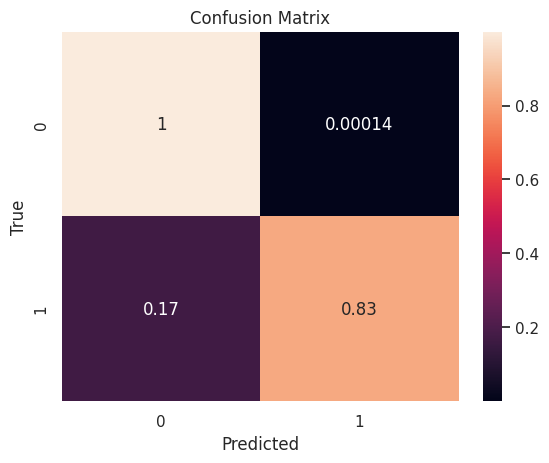

ROC AUC Score: 0.9146


In [66]:
# fazendo previsões
y_pred_XGB = XGBModel.predict(X_test)

## Imprimir relatório
def report(pred):
    print(classification_report(y_test, y_pred_XGB))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, y_pred_XGB, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(y_test, y_pred_XGB), 4)}')

report(XGBModel)

## Avaliar o desempenho do modelo

In [67]:
Comparacao = pd.DataFrame(data={
'labels': ['Accuracy', 'Precision', 'Recall', 'F1_score', 'roc_auc'],
'LogisticRegressionModel': [accuracy_score(y_test, y_pred_LR), precision_score(y_test, y_pred_LR), recall_score(y_test, y_pred_LR), f1_score(y_test, y_pred_LR), roc_auc_score(y_test, y_pred_LR)],
'SVMModel': [accuracy_score(y_test, y_pred_SVM), precision_score(y_test, y_pred_SVM), recall_score(y_test, y_pred_SVM), f1_score(y_test, y_pred_SVM), roc_auc_score(y_test, y_pred_SVM)],
'RandomForestModel': [accuracy_score(y_test, y_pred_RF), precision_score(y_test, y_pred_RF), recall_score(y_test, y_pred_RF), f1_score(y_test, y_pred_RF), roc_auc_score(y_test, y_pred_RF)],
'XGBoost': [accuracy_score(y_test, y_pred_XGB), precision_score(y_test, y_pred_XGB), recall_score(y_test, y_pred_XGB), f1_score(y_test, y_pred_XGB), roc_auc_score(y_test, y_pred_XGB)],
'DecisionTreeModel': [accuracy_score(y_test, y_pred_DT), precision_score(y_test, y_pred_DT), recall_score(y_test, y_pred_DT), f1_score(y_test, y_pred_DT), roc_auc_score(y_test, y_pred_DT)],
}).set_index('labels')
Comparacao.index.name = None

In [68]:
Comparacao

,LogisticRegressionModel,SVMModel,RandomForestModel,XGBoost,DecisionTreeModel
Accuracy,0.967922,0.985394,0.985703,0.999565,0.999494
Precision,0.048475,0.097454,0.099373,0.910714,0.865546
Recall,0.943089,0.902439,0.902439,0.829268,0.837398
F1_score,0.092210,0.175911,0.179032,0.868085,0.851240
roc_auc,0.955527,0.943988,0.944143,0.914564,0.918587


## Conclusões:

Foram construídos cinco modelos supervisionados de Machine Learning para prever se uma transação utilizando cartão de crédito é ou não fraude:


*   Regressão Logística
*   SVM - Support Vector Machine
*   Random Forest
*   XGBoost
*   Decision Tree

Após analisarmos a tabela comparativa, com o desempenho das métricas de cada um,é possível observar:
1. Todos os modelos apresentam acurácia acima de 95%. Sabemos que a acurácia indica a performance geral do modelo, ou seja dentre todas as classificações quantas o modelo classificou corretamente. No entanto, para esse tipo de problema não é tão interessante analisarmos somente a acurácia, pois podemos nos deparar com um modelo que acertou muito os verdadeiros negativos e nem tanto os verdadeiros positivos que é o nosso real objetivo. Adicionalmente, essa não é uma boa métrica para dados tão desbalanceados como esse dataset.
2. O modelo que apresenta o melhor resultado da curva AUC/ROC é o de **Regressão Logística**, com 0,955 seguido do SVM com 0,943. Sabemos que o AUC é uma forma de resumir o valor da curva ROC e demonstra a qualidade do modelo para distinguir entre 0 e 1, quanto mais próximo de 1, demonstra que o modelo consegue distinguir com precisão o binômio.
3. Para um problema de fraudes, precisamos considerar que os **Falsos Negativos** são considerados mais prejudiciais que os **Falsos Positivos**, ou seja, o modelo deve encontrar todos as possíveis transações fraudulentas mesmo que classifique algumas transações normais como fraudulentas. Importante que o resultado do recall seja alto pois classificar transações normais como fraudulentas poderá gerar muito desgaste com os clientes. Desta forma, observa-se que o modelo de **Regressão Logística** é aquele que apresenta um resultado consideravelmente melhor que os demais modelos, com 0,94.
Com base nas análises das métricas acima, recomendamos a utilização do modelo de classificação **Regressão Logística**.


* *Lembrete*:


**Verdadeiros Positivos:** classificação correta da classe Positivo, ou seja, você previu positivo e acertou. Ex: Você previu que uma mulher está grávida e ela realmente está.

**Verdadeiros Negativos:** classificação correta da classe Negativo, ou seja, você previu negativo e acertou. Ex: Você previu que um homem não está grávido e ele realmente não está.

**Falsos Positivos (Erro Tipo I):** erro em que o modelo previu a classe Positivo quando o valor real era classe Negativo, ou seja, você previu positivo e errou.Ex: Você previu que um homem está grávido, mas na verdade ele não está.

**Falsos Negativos (Erro Tipo II):** erro em que o modelo previu a classe Negativo quando o valor real era classe Positivo, ou seja, você previu negativo e errou. Ex: Você previu que uma mulher não está grávida, mas ela realmente está.

Os algoritmos mencionados nesse relatório são amplamente utilizados em diversas aplicações de machine learning devido às suas capacidades de modelagem e precisão preditiva. A escolha do algoritmo depende da natureza do problema, do tamanho e complexidade dos dados, e dos requisitos de desempenho e interpretabilidade.